<a href="https://colab.research.google.com/github/Swamy612/Supervised-Learning/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Data File - https://drive.google.com/file/d/1b3ZtbqWw0knl7yJKHrHYuflLpJewHfM6/view?usp=drive_link

# Data Dictionary
    # 1. age (numeric).
    # 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","selfemployed","retired","technician","services").
    # 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
    # 4. education (categorical: "unknown","secondary","primary","tertiary").
    # 5. default: has credit in default? (binary: "yes","no").
    # 6. balance: average yearly balance, in euros (numeric) .
    # 7. housing: has housing loan? (binary: "yes","no").
    # 8. loan: has personal loan? (binary: "yes","no")

    # Related with the last contact of the current campaign:
    # 9. contact: contact communication type (categorical: "unknown","telephone","cellular") .
    # 10. day: last contact day of the month (numeric).
    # 11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec").
    # 12. duration: last contact duration, in seconds (numeric).
    # 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
    # 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
    # 15. previous: number of contacts performed before this campaign and for this client (numeric).
    # 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

    -- ** TARGET ** --
    # 17. deposit - has the client subscribed a term deposit? (binary: "yes","no").


In [ ]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, classification_report

# ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/bank.csv')
data.shape

(11162, 17)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


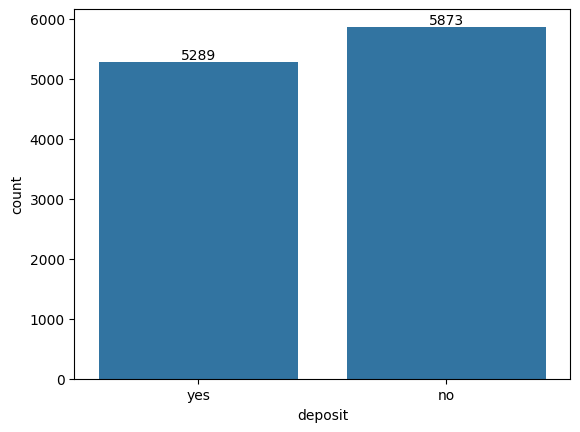

In [ ]:
ax=sns.countplot(x=data['deposit'])
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# data type
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
# number of unique classes in each columns
for cols in data.columns:
  if data[cols].dtype == 'object':
    print(cols,':',data[cols].nunique())

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


# Preparing the data for ML Models

In [ ]:
# dependency split
x=data.drop('deposit',axis=1)
y=data['deposit']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7813, 16) (7813,)
(3349, 16) (3349,)


In [ ]:
# list of cat cols
cat_cols = [cols for cols in x_train.columns if x_train[cols].dtype == 'O']

# Label encoder
encoders = {}

# apply encoder for train data
for col in cat_cols:
    encoders[col] = LabelEncoder()
    x_train[col] = encoders[col].fit_transform(x_train[col])

# apply encoder for test data
for col in cat_cols:
    x_test[col] = encoders[col].transform(x_test[col])

In [ ]:
# data sample after encoding
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7968,57,9,1,1,0,950,1,0,0,9,5,1272,1,-1,0,3
1456,34,9,2,2,0,925,1,0,0,13,0,709,1,-1,0,3
361,41,1,2,1,0,75,1,0,2,1,5,479,9,-1,0,3
812,46,9,2,2,0,4414,0,0,0,18,1,504,7,-1,0,3
1092,28,11,2,1,0,4465,0,0,0,28,4,769,1,-1,0,3


In [ ]:
# No need to scale the data because the decision tree uses GINI Index for comparision of columns
    # range of GINI Index is always between 0 and 1 for any columns with any scale / unit

In [ ]:
# Buliding a simple decision tree model with random parameters
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(x_train, y_train)                 # model training
train_score = model.score(x_train, y_train)
print('Training Score:', round(train_score*100,2), '%')

Training Score: 83.69 %


In [ ]:
# test prediction
y_pred = model.predict(x_test)

# accuracy score
test_score = accuracy_score(y_test, y_pred)
print('Testing Score:', round(test_score*100,2), '%')

Testing Score: 81.55 %


              precision    recall  f1-score   support

          no       0.80      0.86      0.83      1742
         yes       0.84      0.76      0.80      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.81      0.81      3349
weighted avg       0.82      0.82      0.81      3349



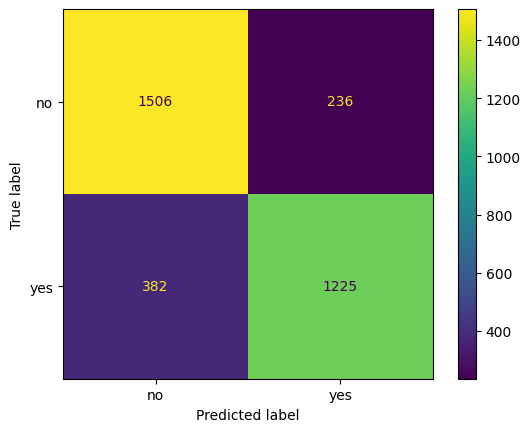

In [ ]:
# Confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
# Model with high training score and low testing score is called as overfitting model

In [ ]:
# Homework
    # try max_depth = 6, 7, 8, 9, 10, 11
    # find out which is the best model comparing the train and test accuarcy
    # read about over fitting (models performs well in training and poorly in testing)

In [ ]:
# loop to find the best max depth

for depth in range(6, 12):
    iter_model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    iter_model.fit(x_train, y_train)
    train_accuracy = iter_model.score(x_train, y_train)
    print(f'Training accuracy from model with max_depth_{depth}:', round(train_accuracy*100, 2), '%')
    y_pred_iter = iter_model.predict(x_test)
    print(f'Testing accuracy from model with max_depth_{depth}:', round(accuracy_score(y_test, y_pred_iter)*100, 2), '%')
    print()

Training accuracy from model with max_depth_6: 82.29 %
Testing accuracy from model with max_depth_6: 80.62 %

Training accuracy from model with max_depth_7: 83.69 %
Testing accuracy from model with max_depth_7: 81.55 %

Training accuracy from model with max_depth_8: 85.15 %
Testing accuracy from model with max_depth_8: 81.31 %

Training accuracy from model with max_depth_9: 87.16 %
Testing accuracy from model with max_depth_9: 80.68 %

Training accuracy from model with max_depth_10: 88.76 %
Testing accuracy from model with max_depth_10: 80.77 %

Training accuracy from model with max_depth_11: 90.82 %
Testing accuracy from model with max_depth_11: 81.07 %



In [ ]:
# parameter for the grid
params = {'max_depth': list(range(6, 13)),
          'min_samples_split': list(range(2, 9, 2)),
          'min_samples_leaf': list(range(1, 5))}
# estimator
dt=DecisionTreeClassifier(random_state=42)

grid_search=GridSearchCV(estimator=dt,
                         param_grid=params,
                         verbose=4,
                         n_jobs=-1,
                         cv=5)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=4)

In [ ]:

# display the best param and the score
print('Best Parameters from the grid search are:', grid_search.best_params_)
print('Score for the best params:', round(grid_search.best_score_*100, 2), '%')

Best Parameters from the grid search are: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
Score for the best params: 81.03 %


In [ ]:
# Building the final model with best parameters
best_params = grid_search.best_params_
final_model = DecisionTreeClassifier(**best_params ,random_state=42)

# fit the data onto the model
final_model.fit(x_train, y_train)
print('Training Score:', round(final_model.score(x_train, y_train)*100, 2), '%')

Training Score: 84.95 %


              precision    recall  f1-score   support

          no       0.82      0.82      0.82      1742
         yes       0.81      0.80      0.80      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



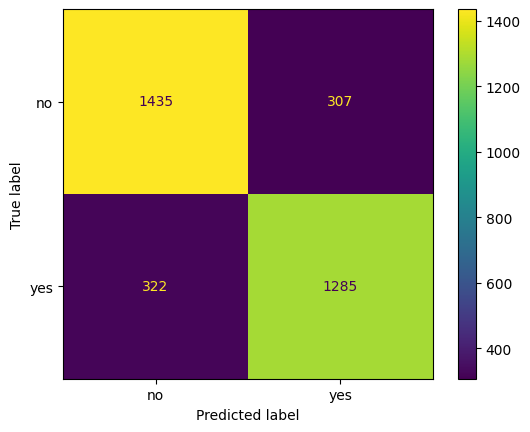

In [ ]:
# test prediction
y_pred_final = final_model.predict(x_test)

# Detailed metrics
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final)
print(classification_report(y_test,y_pred_final))

In [ ]:
# Textual tree
print(export_text(final_model, feature_names=list(x_train.columns)))

|--- duration <= 251.50
|   |--- pdays <= 17.50
|   |   |--- month <= 9.50
|   |   |   |--- month <= 0.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- duration <= 95.00
|   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- duration >  95.00
|   |   |   |   |   |   |--- day <= 29.50
|   |   |   |   |   |   |   |--- age <= 72.50
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |   |--- age >  72.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- day >  29.50
|   |   |   |   |   |   |   |--- duration <= 173.00
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- duration >  173.00
|   |   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |--- housing >  0.50
|   |   |   |   |   |--- day <= 20.50
|   |   |   |   |   |   |--- age <= 60.00
|   |   |   |   |   |   |   |--- balance <= 82.00
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- balance >  82.0

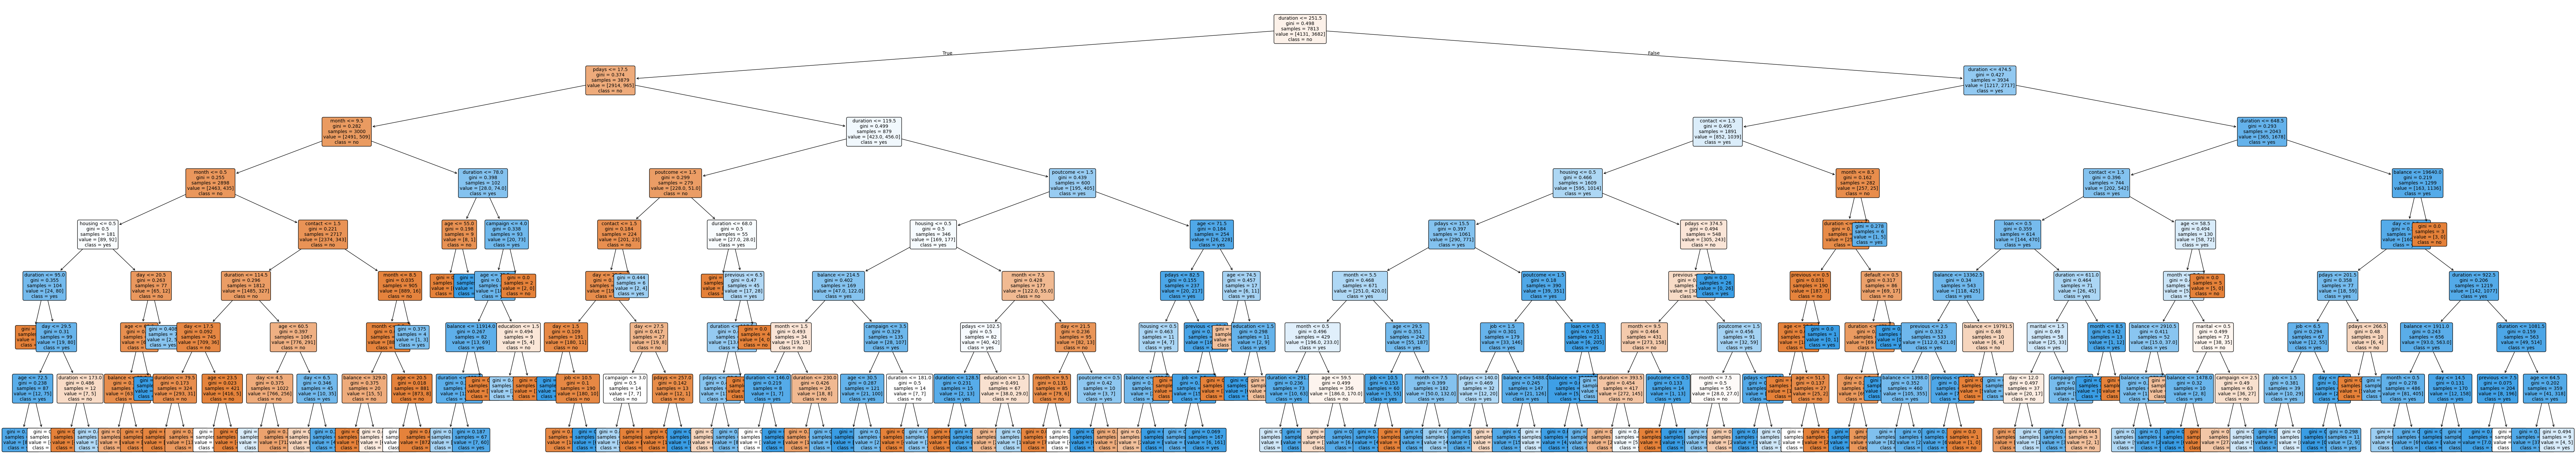

In [ ]:
# visualize the tree
plt.figure(figsize=(99,18))
plot_tree(final_model,
          feature_names=list(x_train.columns),
          class_names=['no', 'yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.savefig('/content/sample_data/Decision_tree.png', bbox_inches='tight')
plt.show()